### Detailed and Full Solution (Step by Step)
Hello kagglers ..

This notebook designed to be as detailed as possible solution for the Houses pricing problem, I tried to make it typical, clear, tidy and beginner-friendly.

If you find this notebook useful press the UPVOTE button, This helps me a lot ^-^.
I hope you find it helpful.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
testId=test['Id']

### Removing the Id

We already have an index, so we don't need the Id unique identifier for the regression we will perform later on.

In [5]:
train.drop('Id',axis=1,inplace=True)

In [6]:
test.drop('Id',axis=1,inplace=True)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

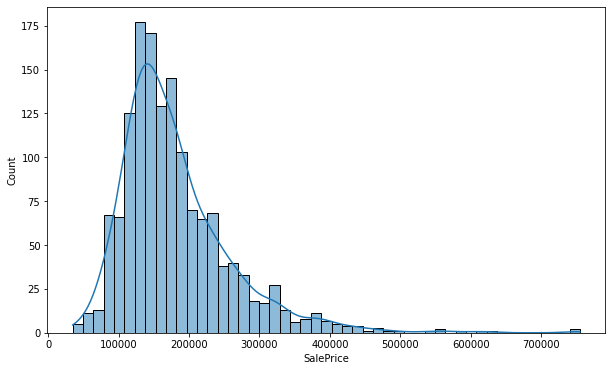

In [10]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(train.SalePrice , kde = True)


The skewness is a measure of symmetry or asymmetry of data distribution, and kurtosis measures whether data is heavy-tailed or light-tailed in a normal distribution. Data can be positive-skewed (data-pushed towards the right side) or negative-skewed (data-pushed towards the left side).

In [11]:
print('SalePrice Skewness is = ' , train.SalePrice.skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

SalePrice Skewness is =  1.8828757597682129
Kurtosis: 6.536282


<AxesSubplot:>

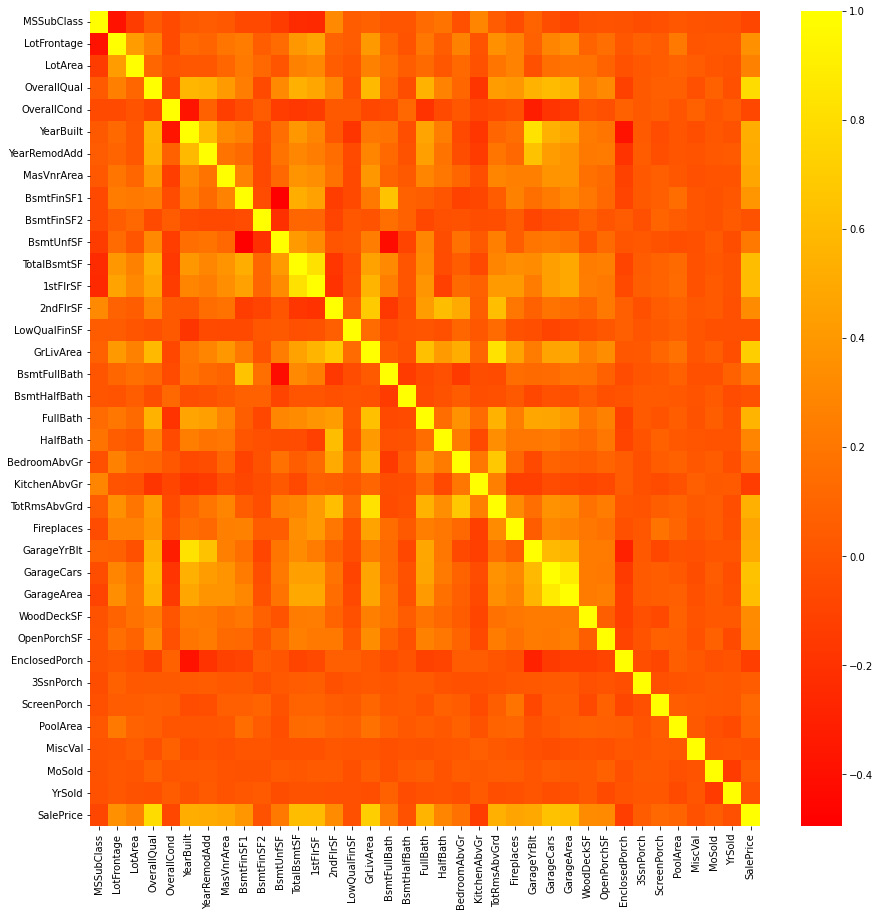

In [12]:
plt.figure(figsize= (15 , 15))
sns.heatmap(train.corr(),cmap='autumn')

In [13]:
all_data=pd.concat([train,test]).reset_index(drop=True)

In [14]:
SalePrice=train['SalePrice']

In [15]:
all_data.drop(columns=['SalePrice'],axis=1,inplace=True)

In [16]:
all_data.shape

(2919, 79)

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

In [17]:
def percent_missing(df):
    missing=100*df.isnull().sum()/len(df)
    missing=missing[missing>0].sort_values()
    return missing
    

In [18]:
per_miss=percent_missing(all_data)

In [19]:
per_miss[per_miss>1]

BsmtFinType1     2.706406
BsmtFinType2     2.740665
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
GarageType       5.378554
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
LotFrontage     16.649538
FireplaceQu     48.646797
Fence           80.438506
Alley           93.216855
MiscFeature     96.402878
PoolQC          99.657417
dtype: float64

In [20]:
per_miss.index

Index(['TotalBsmtSF', 'GarageArea', 'GarageCars', 'KitchenQual', 'Electrical',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'SaleType', 'Exterior1st',
       'Exterior2nd', 'Functional', 'Utilities', 'BsmtHalfBath',
       'BsmtFullBath', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageType',
       'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')

## Example of Filling in Data : Basement Columns

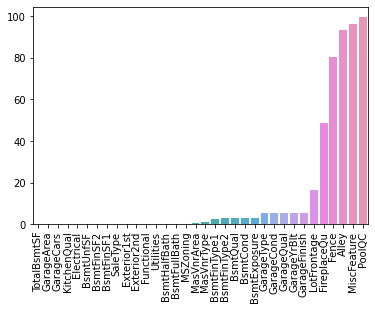

In [21]:
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it.Probably makes more sense to fill in the Missing Basement data since its well described in the text description.

(0.0, 10.0)

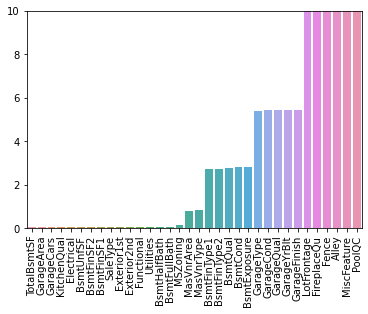

In [22]:
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
# Set 10% Threshold
plt.ylim(0,10)

In [23]:
all_data[all_data['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal


In [24]:
all_data[all_data['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,12,2008,New,Partial
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2007,New,Partial
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,New,Partial
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
1691,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1706,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2009,New,Partial


### Mas Vnr Feature

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data.

In [25]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)


(0.0, 5.0)

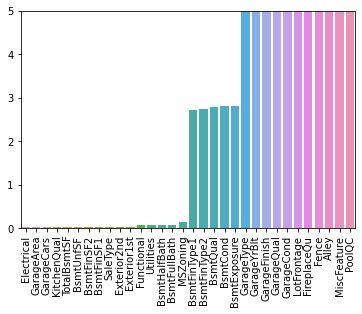

In [26]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
plt.ylim(0,5)

In [27]:
all_data['Electrical']=all_data['Electrical'].fillna('None')

(0.0, 5.0)

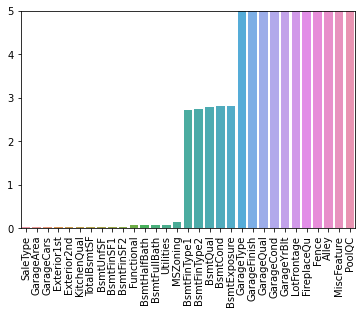

In [28]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
plt.ylim(0,5)

In [29]:
all_data['BsmtQual']=all_data['BsmtQual'].fillna('None')

In [30]:
all_data['BsmtCond']=all_data['BsmtCond'].fillna('None')

In [31]:
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna('None')

In [32]:
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna('None')

In [33]:
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna('None')

In [34]:
all_data['BsmtFinSF1']=all_data['BsmtFinSF1'].fillna(0)

In [35]:
all_data['BsmtFinSF2']=all_data['BsmtFinSF2'].fillna(0)

In [36]:
all_data['BsmtFullBath']=all_data['BsmtFullBath'].fillna(0)

In [37]:
all_data['BsmtHalfBath']=all_data['BsmtHalfBath'].fillna(0)

In [38]:
all_data['TotalBsmtSF']=all_data['TotalBsmtSF'].fillna(0)

In [39]:
all_data['BsmtUnfSF']=all_data['BsmtUnfSF'].fillna(0)

(0.0, 2.0)

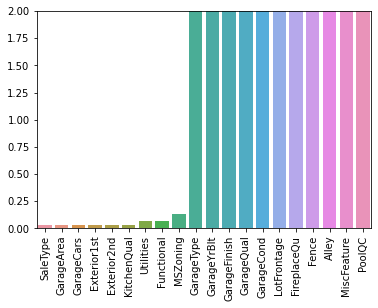

In [40]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
plt.ylim(0,2)

### Garage Columns
Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [41]:
all_data['GarageType']=all_data['GarageType'].fillna('None')

In [42]:
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(0.0)

In [43]:
all_data['GarageFinish']=all_data['GarageFinish'].fillna('None')

In [44]:
all_data['GarageQual']=all_data['GarageQual'].fillna('None')

In [45]:
all_data['GarageCond']=all_data['GarageCond'].fillna('None')

In [46]:
all_data['GarageArea']=all_data['GarageArea'].fillna(0)

In [47]:
all_data['GarageCars']=all_data['GarageCars'].fillna(0)

(0.0, 10.0)

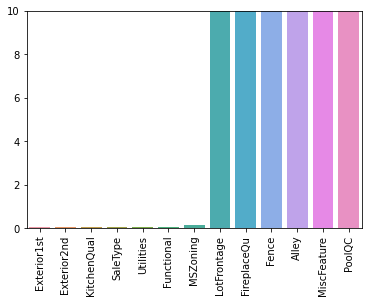

In [48]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
plt.ylim(0,10)

In [49]:
all_data['Exterior1st']=all_data['Exterior1st'].fillna('None')

In [50]:
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna('None')

In [51]:
all_data['KitchenQual']=all_data['KitchenQual'].fillna('None')

In [52]:
all_data['SaleType']=all_data['SaleType'].fillna('None')

In [53]:
all_data['Functional']=all_data['Functional'].fillna('None')

In [54]:
all_data['MSZoning']=all_data['MSZoning'].fillna('None')

(0.0, 100.0)

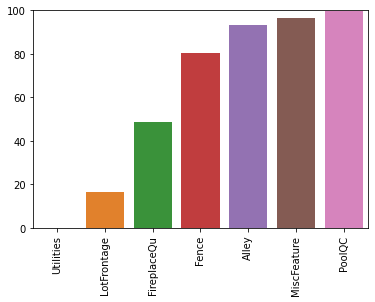

In [55]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
plt.ylim(0,100)

In [56]:
all_data.drop('Utilities',axis=1,inplace=True)

## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [57]:
all_data=all_data.drop(['Fence','Alley','MiscFeature','PoolQC'],axis=1)

(0.0, 100.0)

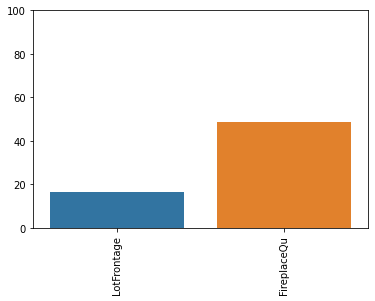

In [58]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);
plt.ylim(0,100)

### Filling in Fireplace Quality based on Description Text

In [59]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

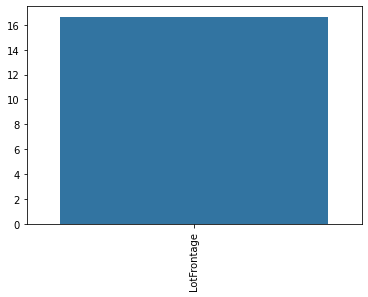

In [60]:
per_miss=percent_missing(all_data)
sns.barplot(x=per_miss.index,y=per_miss)
plt.xticks(rotation=90);


### Imputation of Missing Data
To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data.

In [61]:
from sklearn.impute import KNNImputer

In [62]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
all_data['LotFrontage']=imputer.fit_transform(all_data[['LotFrontage']])


In [63]:
all_data['LotFrontage'].isnull().sum()

0

In [64]:
per_miss=percent_missing(all_data)


In [65]:
per_miss

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set.

In [66]:
#all_data

In [67]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [68]:
all_data.shape

(2919, 74)

In [69]:
train_data = all_data[:len(train)]
train_data["SalePrice"] = SalePrice
test_data = all_data[len(train):]

# Dealing with Outliers

In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Remember that even if a data point is an outlier, its still a data point! Carefully consider your data, its sources, and your goals whenever deciding to remove an outlier. Each case is different!


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

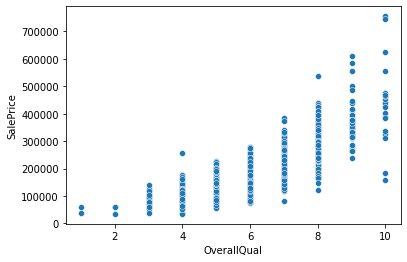

In [70]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_data)

In [71]:
train_data[(train_data['OverallQual']>8)&(train_data['SalePrice']<200000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,IR1,Bnk,Inside,Gtl,Edwards,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,IR3,Bnk,Corner,Gtl,Edwards,...,0,0,0,480,0,1,2008,New,Partial,160000


In [72]:
int_drop=train_data[(train_data['OverallQual']>8)&(train_data['SalePrice']<200000)].index


In [73]:
train_data=train_data.drop(int_drop,axis=0)

In [74]:
train_data[(train_data['OverallQual']>8)&(train_data['SalePrice']<200000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

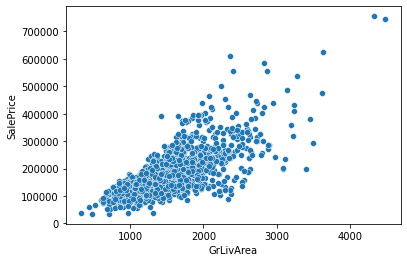

In [75]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

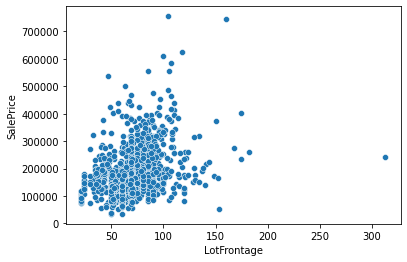

In [76]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=train_data)

In [77]:
train_data[(train_data['LotFrontage']>250)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,IR2,HLS,Inside,Mod,NAmes,...,0,0,0,0,0,11,2008,WD,Normal,242000


In [78]:
int_drop=train_data[(train_data['LotFrontage']>250)].index

In [79]:
train_data=train_data.drop(int_drop,axis=0)

In [80]:
train_data[(train_data['LotFrontage']>250)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

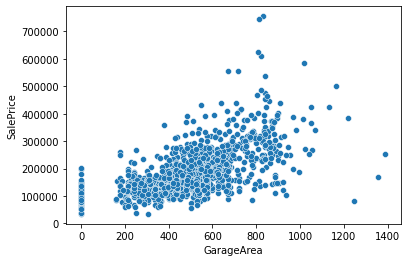

In [81]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_data)

In [82]:
train_data[(train_data['GarageArea']>1200)&(train_data['SalePrice']<300000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,20,RL,98.000000,12704,Pave,Reg,Lvl,Inside,Gtl,NridgHt,...,0,0,0,0,0,8,2009,New,Partial,253293
1061,30,C (all),120.000000,18000,Grvl,Reg,Low,Inside,Gtl,IDOTRR,...,0,0,0,0,560,8,2008,ConLD,Normal,81000
1190,190,RL,69.305795,32463,Pave,Reg,Low,Inside,Mod,Mitchel,...,0,0,0,0,0,3,2007,WD,Normal,168000


In [83]:
int_drop=train_data[(train_data['GarageArea']>1200)&(train_data['SalePrice']<300000)].index


In [84]:
train_data=train_data.drop(int_drop,axis=0)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

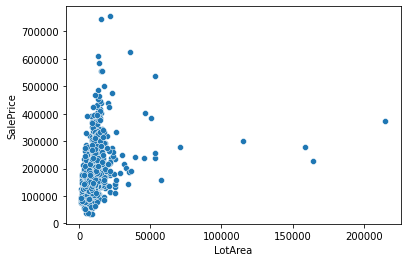

In [85]:
sns.scatterplot(x='LotArea',y='SalePrice',data=train_data)

In [86]:
train_data[(train_data['LotArea']>=100000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,69.305795,159000,Pave,IR2,Low,CulDSac,Sev,ClearCr,...,0,0,0,0,500,6,2007,WD,Normal,277000
313,20,RL,150.000000,215245,Pave,IR3,Low,Inside,Sev,Timber,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,190,RL,69.305795,164660,Grvl,IR1,HLS,Corner,Sev,Timber,...,0,0,0,0,700,8,2008,WD,Normal,228950
706,20,RL,69.305795,115149,Pave,IR2,Low,CulDSac,Sev,ClearCr,...,0,0,0,0,0,6,2007,WD,Normal,302000


In [87]:
int_drop=train_data[(train_data['LotArea']>=100000)].index


In [88]:
train_data=train_data.drop(int_drop,axis=0)

In [89]:
train_data[(train_data['LotArea']>=100000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

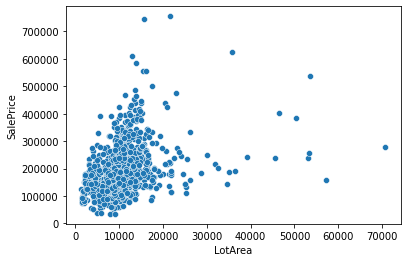

In [90]:
sns.scatterplot(x='LotArea',y='SalePrice',data=train_data)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

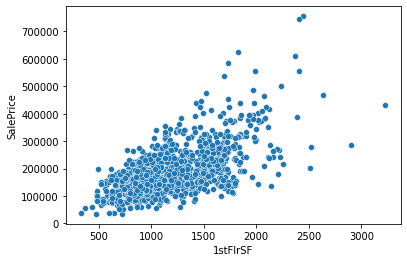

In [91]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train_data)

In [92]:
train_data[(train_data['1stFlrSF']>2700)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
496,20,RL,69.305795,12692,Pave,IR1,Lvl,Inside,Gtl,NoRidge,...,291,0,0,0,0,5,2007,WD,Normal,430000
1024,20,RL,69.305795,15498,Pave,IR1,Lvl,Corner,Gtl,Timber,...,174,0,0,0,0,5,2008,COD,Abnorml,287000


In [93]:
int_drop=train_data[(train_data['1stFlrSF']>2700)].index


In [94]:
train_data=train_data.drop(int_drop,axis=0)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

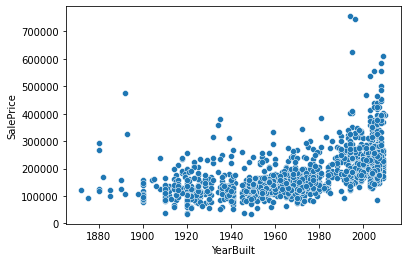

In [95]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train_data)

In [96]:
train_data[(train_data['YearBuilt']<1900)&(train_data['SalePrice']>400000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,75,RM,90.0,22950,Pave,IR2,Lvl,Inside,Gtl,OldTown,...,0,0,410,0,0,6,2006,WD,Normal,475000


In [97]:
int_drop=train_data[(train_data['YearBuilt']<1900)&(train_data['SalePrice']>400000)].index


In [98]:
train_data=train_data.drop(int_drop,axis=0)

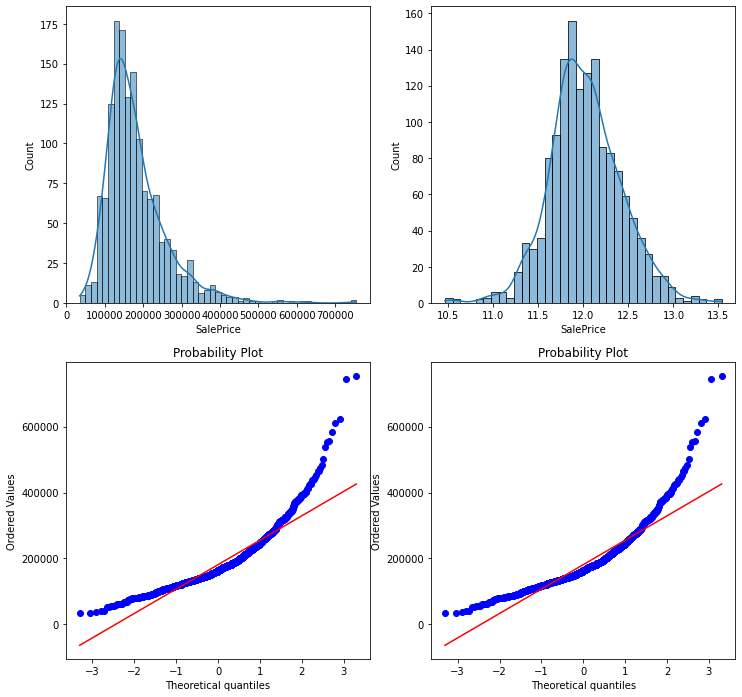

In [99]:
# ==================================================================
# Sale Price
# ==================================================================

plot , ax = plt.subplots(2 , 2 , figsize = (12 , 12))
g = sns.histplot(SalePrice , kde = True , ax = ax[0][0])
res = stats.probplot(SalePrice, plot= ax[1][0])
sale_price = np.log1p(train_data["SalePrice"])
g = sns.histplot(sale_price , kde = True , ax = ax[0][1])
res = stats.probplot(SalePrice, plot= ax[1][1])


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1447 non-null   object 
 1   MSZoning       1447 non-null   object 
 2   LotFrontage    1447 non-null   float64
 3   LotArea        1447 non-null   int64  
 4   Street         1447 non-null   object 
 5   LotShape       1447 non-null   object 
 6   LandContour    1447 non-null   object 
 7   LotConfig      1447 non-null   object 
 8   LandSlope      1447 non-null   object 
 9   Neighborhood   1447 non-null   object 
 10  Condition1     1447 non-null   object 
 11  Condition2     1447 non-null   object 
 12  BldgType       1447 non-null   object 
 13  HouseStyle     1447 non-null   object 
 14  OverallQual    1447 non-null   int64  
 15  OverallCond    1447 non-null   int64  
 16  YearBuilt      1447 non-null   int64  
 17  YearRemodAdd   1447 non-null   int64  
 18  RoofStyl

In [101]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
all_data.drop(columns = ["SalePrice"] , inplace = True)
all_data.shape

(2906, 74)

In [102]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

 #Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.931148
PoolArea,17.654963
LowQualFinSF,12.388194
3SsnPorch,11.350139
KitchenAbvGr,4.291165
BsmtFinSF2,4.161925
EnclosedPorch,4.018686
BsmtHalfBath,3.935672
ScreenPorch,3.924461
LotArea,3.627010


In [103]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 33 skewed numerical features to Box Cox transform


# Dealing with Categorical Data

Many machine learning models can not deal with categorical data set as strings. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

## Creating Dummy Variables from Object Columns


In [104]:
df_nums = all_data.select_dtypes(exclude='object')
df_objs = all_data.select_dtypes(include='object')

### Converting

In [105]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [106]:
all_data = pd.concat([df_nums,df_objs],axis=1)

In [107]:
all_data.shape

(2906, 278)

In [108]:
all_data.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.831328,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,0.0,7.483296,...,0,0,0,0,1,0,0,0,1,0
1,6.221214,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,0.0,8.897844,...,0,0,0,0,1,0,0,0,1,0
2,5.914940,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,0.0,9.917060,...,0,0,0,0,1,0,0,0,1,0
3,5.684507,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,0.0,10.468500,...,0,0,0,0,1,0,0,0,0,0
4,6.314735,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,0.0,10.221051,...,0,0,0,0,1,0,0,0,1,0


In [109]:
train_data = all_data[:len(train_data)]
test_data = all_data[len(train_data):]

In [110]:
target = sale_price
train = train_data

# Modelling

In [111]:
from sklearn.model_selection import KFold, cross_val_score


In [112]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)
scores = {}

In [113]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train , Y=target):
    rmse = np.sqrt(-cross_val_score(model,X, Y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

------------
## DecisionTreeRegressor

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV , learning_curve


In [115]:
decision_tree_model = DecisionTreeRegressor()
score = cv_rmse(decision_tree_model)
print("Decision Tree Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Decision Tree Model: 0.1992 (0.0164)


In [116]:
clf = GridSearchCV(decision_tree_model , {
    "max_depth" : [6,7,8,9,10,11,12],
    "min_samples_split": [6,7,8,9,10],
    "min_samples_leaf" : [5,7,8,9,10]
},verbose = 1)
clf.fit(train , target)
clf.best_estimator_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


DecisionTreeRegressor(max_depth=11, min_samples_leaf=7, min_samples_split=6)

In [117]:
score = cv_rmse(clf.best_estimator_)
print("Decision Tree Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['decision_tree'] = (score.mean(), score.std())

Decision Tree Model: 0.1779 (0.0192)


----
## Random Forest Regressor


In [118]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [119]:
# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
score = cv_rmse(random_forest_model)
print("Random Forest Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['random_forest'] = (score.mean(), score.std())

Random Forest Model: 0.1354 (0.0222)


--------
## Ridge Regressor


In [120]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


In [121]:
# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))
score = cv_rmse(ridge)
print("Ridge Regressor: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge_model'] = (score.mean(), score.std())

Ridge Regressor: 0.1110 (0.0168)


-----------------
## XGBoost Regressor


In [122]:
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [123]:
# XGBoost Regressor
xgboost = XGBRegressor(objective='reg:squarederror',random_state=42)
score = cv_rmse(xgboost)
print("xgboost_model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Xgboost'] = (score.mean(), score.std())

xgboost_model: 0.1318 (0.0164)


------------
## Light Gradient Boosting Regressor


In [124]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', verbose=1,random_state=42)
score = cv_rmse(lightgbm)
print("Light Gbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lgbm'] = (score.mean(), score.std())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3357
[LightGBM] [Info] Number of data points in the train set: 1326, number of used features: 189
[LightGBM] [Info] Start training from score 12.028299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3339
[LightGBM] [Info] Number of data points in the train set: 1326, number of used features: 187
[LightGBM] [Info] Start training from score 12.025627
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the ove

----------------------
## Gradient Boosting Regressor


In [125]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='huber',random_state=42)  
score = cv_rmse(gbr)
print("gradient_boosting: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gradient boosting'] = (score.mean(), score.std())

gradient_boosting: 0.1225 (0.0190)


-----------
## Support Vector Regressor


In [126]:
from sklearn.svm import SVR


In [127]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
score = cv_rmse(svr)
print("Support Vector Machine: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Support Vector Machine'] = (score.mean(), score.std())

Support Vector Machine: 0.1106 (0.0190)


In [128]:
decision_tree_model_full_data = decision_tree_model.fit(train , target)
random_forest_model_full_data = random_forest_model.fit(train , target)
gbr_full_data = gbr.fit(train , target)
xgboost_full_data = xgboost.fit(train , target)
ridge_full_data = ridge.fit(train , target)
svr_full_data = svr.fit(train , target)
lightgbm_full_data = lightgbm.fit(train , target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3422
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 190
[LightGBM] [Info] Start training from score 12.020667


In [129]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * random_forest_model_full_data.predict(X)) + \
            (0.2 * gbr_full_data.predict(X)) + \
            (0.1 * xgboost_full_data.predict(X)) + \
            (0.2 * ridge_full_data.predict(X)) + \
            (0.1 * lightgbm_full_data.predict(X)) + \
            (0.3 * svr_full_data.predict(X)))

In [130]:
from sklearn.metrics import mean_squared_error


In [131]:
# Get final precitions from the blended model
blended_score = rmsle(target, blended_predictions(train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07136894941793442


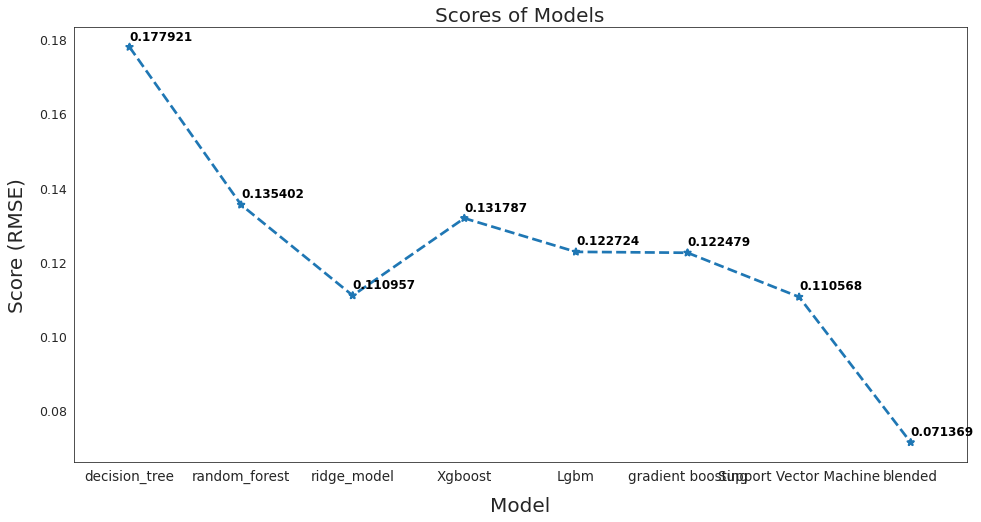

In [132]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(16, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['*'], linestyles=['--'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [133]:
# Read in sample_submission dataframe
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.shape

(1459, 2)

In [134]:
 #Append predictions from blended models
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(test_data)))

In [135]:
# Fix outleir predictions
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_regression1.csv", index=False)

In [136]:
# Scale predictions
submission['SalePrice'] *= 1.001619
submission.to_csv("submission_regression2.csv", index=False)